In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
accepted = pd.read_csv('accepted_2007_to_2018_100T.csv' )


C:\Users\hannan\anaconda3\envs\mlProject\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
rejected = pd.read_csv('rejected_2007_to_2018_100T.csv', low_memory=False, encoding="ISO-8859-1")

In [4]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0;;
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0;;
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0;;
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0;;
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0;;
...,...,...,...,...,...,...,...,...,...
99996,25000.0,2010-03-10,small_business,670.0,26.96%,021xx,MA,10+ years,0.0;;
99997,4000.0,2010-03-10,credit_card,676.0,64.48%,184xx,PA,10+ years,0.0;;
99998,5000.0,2010-03-10,debt_consolidation,606.0,21.9%,851xx,AZ,3 years,0.0;;
99999,2800.0,2010-03-10,debt_consolidation,727.0,31.33%,339xx,FL,5 years,0.0;;


In [5]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Amount Requested      100001 non-null  object
 1   Application Date      98973 non-null   object
 2   Loan Title            98961 non-null   object
 3   Risk_Score            89742 non-null   object
 4   Debt-To-Income Ratio  98973 non-null   object
 5   Zip Code              98953 non-null   object
 6   State                 98953 non-null   object
 7   Employment Length     98202 non-null   object
 8   Policy Code;;         98971 non-null   object
dtypes: object(9)
memory usage: 6.9+ MB


In [6]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Columns: 151 entries, id to settlement_term;
dtypes: float64(113), object(38)
memory usage: 115.2+ MB


In [7]:
rejected.isna().sum().sum()

18280

In [8]:
rejected = rejected.dropna(axis=0).reset_index(drop=True)

In [9]:
rejected.isna().sum().sum()

0

In [10]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0;;
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0;;
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0;;
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0;;
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0;;
...,...,...,...,...,...,...,...,...,...
88940,25000.0,2010-03-10,small_business,670.0,26.96%,021xx,MA,10+ years,0.0;;
88941,4000.0,2010-03-10,credit_card,676.0,64.48%,184xx,PA,10+ years,0.0;;
88942,5000.0,2010-03-10,debt_consolidation,606.0,21.9%,851xx,AZ,3 years,0.0;;
88943,2800.0,2010-03-10,debt_consolidation,727.0,31.33%,339xx,FL,5 years,0.0;;


In [11]:
rejected.dtypes

Amount Requested        object
Application Date        object
Loan Title              object
Risk_Score              object
Debt-To-Income Ratio    object
Zip Code                object
State                   object
Employment Length       object
Policy Code;;           object
dtype: object

In [12]:


rejected['Risk_Score'] = rejected['Risk_Score'].astype(float)


In [13]:
rejected.dtypes

Amount Requested         object
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code;;            object
dtype: object

In [14]:
rejected['Amount Requested'] = rejected['Amount Requested'].astype(float)

In [15]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code;;            object
dtype: object

In [16]:
rejected.loc[4, 'Debt-To-Income Ratio'][0:-1]

'9.43'

In [17]:
rejected['Debt-To-Income Ratio']= rejected['Debt-To-Income Ratio'].apply(lambda x: x[0:-1])

In [18]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10,481xx,NM,4 years,0.0;;
1,1000.0,2007-05-26,Consolidating Debt,703.0,10,010xx,MA,< 1 year,0.0;;
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10,212xx,MD,1 year,0.0;;
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0;;
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0;;
...,...,...,...,...,...,...,...,...,...
88940,25000.0,2010-03-10,small_business,670.0,26.96,021xx,MA,10+ years,0.0;;
88941,4000.0,2010-03-10,credit_card,676.0,64.48,184xx,PA,10+ years,0.0;;
88942,5000.0,2010-03-10,debt_consolidation,606.0,21.9,851xx,AZ,3 years,0.0;;
88943,2800.0,2010-03-10,debt_consolidation,727.0,31.33,339xx,FL,5 years,0.0;;


In [19]:
rejected['Debt-To-Income Ratio'] = rejected['Debt-To-Income Ratio'].astype(float)

In [20]:
rejected.loc[4, 'Policy Code;;'][0:-2]

'0.0'

In [21]:
rejected['Policy Code;;']= rejected['Policy Code;;'].apply(lambda x: x[0:-2])

In [22]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
88940,25000.0,2010-03-10,small_business,670.0,26.96,021xx,MA,10+ years,0.0
88941,4000.0,2010-03-10,credit_card,676.0,64.48,184xx,PA,10+ years,0.0
88942,5000.0,2010-03-10,debt_consolidation,606.0,21.90,851xx,AZ,3 years,0.0
88943,2800.0,2010-03-10,debt_consolidation,727.0,31.33,339xx,FL,5 years,0.0


In [23]:
rejected['Policy Code;;'] = rejected['Policy Code;;'].astype(float)

In [24]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
88940,25000.0,2010-03-10,small_business,670.0,26.96,021xx,MA,10+ years,0.0
88941,4000.0,2010-03-10,credit_card,676.0,64.48,184xx,PA,10+ years,0.0
88942,5000.0,2010-03-10,debt_consolidation,606.0,21.90,851xx,AZ,3 years,0.0
88943,2800.0,2010-03-10,debt_consolidation,727.0,31.33,339xx,FL,5 years,0.0


In [25]:
rejected.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code;;           float64
dtype: object

In [26]:
accepted.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [27]:
rejected = rejected.rename(columns={"Debt-To-Income Ratio": "dti", "Amount Requested": "loan_amnt","State": "addr_state"})

In [28]:
rejected = rejected.rename(columns={"Employment Length": "emp_length", "Policy Code;;": "policy_code"})

In [29]:
rejected

,loan_amnt,Application Date,Loan Title,Risk_Score,dti,Zip Code,addr_state,emp_length,policy_code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
88940,25000.0,2010-03-10,small_business,670.0,26.96,021xx,MA,10+ years,0.0
88941,4000.0,2010-03-10,credit_card,676.0,64.48,184xx,PA,10+ years,0.0
88942,5000.0,2010-03-10,debt_consolidation,606.0,21.90,851xx,AZ,3 years,0.0
88943,2800.0,2010-03-10,debt_consolidation,727.0,31.33,339xx,FL,5 years,0.0


In [30]:
accepted = accepted[['loan_amnt','fico_range_low', 'fico_range_high', 'dti', 'addr_state', 'emp_length', 'policy_code',  
                     ]]
accepted.dropna().head(10)

,loan_amnt,fico_range_low,fico_range_high,dti,addr_state,emp_length,policy_code
0,3600.0,675.0,679.0,5.91,PA,10+ years,1.0
1,24700.0,715.0,719.0,16.06,SD,10+ years,1.0
2,20000.0,695.0,699.0,10.78,IL,10+ years,1.0
3,35000.0,785.0,789.0,17.06,NJ,10+ years,1.0
4,10400.0,695.0,699.0,25.37,PA,3 years,1.0
5,11950.0,690.0,694.0,10.20,GA,4 years,1.0
6,20000.0,680.0,684.0,14.67,MN,10+ years,1.0
7,20000.0,705.0,709.0,17.61,SC,10+ years,1.0
8,10000.0,685.0,689.0,13.07,PA,6 years,1.0
9,8000.0,700.0,704.0,34.80,RI,10+ years,1.0


In [31]:
rejected = rejected[['loan_amnt','Risk_Score', 'dti', 'addr_state', 'emp_length', 'policy_code',  
                     ]]
rejected.dropna().head(10)

,loan_amnt,Risk_Score,dti,addr_state,emp_length,policy_code
0,1000.0,693.0,10.00,NM,4 years,0.0
1,1000.0,703.0,10.00,MA,< 1 year,0.0
2,11000.0,715.0,10.00,MD,1 year,0.0
3,6000.0,698.0,38.64,MA,< 1 year,0.0
4,1500.0,509.0,9.43,MD,< 1 year,0.0
5,15000.0,645.0,0.00,NY,3 years,0.0
6,10000.0,693.0,10.00,MD,< 1 year,0.0
7,3900.0,700.0,10.00,IN,2 years,0.0
8,3000.0,694.0,10.00,CO,4 years,0.0
9,2500.0,573.0,11.76,KY,4 years,0.0


In [32]:
accepted.loc[:, ['fico_range_low','fico_range_high']]

,fico_range_low,fico_range_high
0,675.0,679.0
1,715.0,719.0
2,695.0,699.0
3,785.0,789.0
4,695.0,699.0
...,...,...
99997,665.0,669.0
99998,730.0,734.0
99999,705.0,709.0
100000,685.0,689.0


In [33]:


##accepted['mean'] = accepted.iloc[:, 0:4].mean(axis=1)



In [34]:
accepted = accepted.dropna(axis=0).reset_index(drop=True)

In [35]:
rejected.isna().sum().sum()

0

In [36]:
accepted['Risk_Score'] = accepted.loc[:, ['fico_range_low','fico_range_high']].mean(axis=1)



In [37]:
accepted


,loan_amnt,fico_range_low,fico_range_high,dti,addr_state,emp_length,policy_code,Risk_Score
0,3600.0,675.0,679.0,5.91,PA,10+ years,1.0,677.0
1,24700.0,715.0,719.0,16.06,SD,10+ years,1.0,717.0
2,20000.0,695.0,699.0,10.78,IL,10+ years,1.0,697.0
3,35000.0,785.0,789.0,17.06,NJ,10+ years,1.0,787.0
4,10400.0,695.0,699.0,25.37,PA,3 years,1.0,697.0
...,...,...,...,...,...,...,...,...
92936,3000.0,695.0,699.0,19.23,FL,8 years,1.0,697.0
92937,14000.0,665.0,669.0,23.43,NC,3 years,1.0,667.0
92938,24000.0,705.0,709.0,19.26,IN,3 years,1.0,707.0
92939,6000.0,685.0,689.0,20.83,NE,4 years,1.0,687.0


In [38]:
accepted = accepted[['loan_amnt','Risk_Score', 'dti', 'addr_state', 'emp_length', 'policy_code',  
                     ]]
accepted.dropna()

,loan_amnt,Risk_Score,dti,addr_state,emp_length,policy_code
0,3600.0,677.0,5.91,PA,10+ years,1.0
1,24700.0,717.0,16.06,SD,10+ years,1.0
2,20000.0,697.0,10.78,IL,10+ years,1.0
3,35000.0,787.0,17.06,NJ,10+ years,1.0
4,10400.0,697.0,25.37,PA,3 years,1.0
...,...,...,...,...,...,...
92936,3000.0,697.0,19.23,FL,8 years,1.0
92937,14000.0,667.0,23.43,NC,3 years,1.0
92938,24000.0,707.0,19.26,IN,3 years,1.0
92939,6000.0,687.0,20.83,NE,4 years,1.0


In [39]:
rejected


,loan_amnt,Risk_Score,dti,addr_state,emp_length,policy_code
0,1000.0,693.0,10.00,NM,4 years,0.0
1,1000.0,703.0,10.00,MA,< 1 year,0.0
2,11000.0,715.0,10.00,MD,1 year,0.0
3,6000.0,698.0,38.64,MA,< 1 year,0.0
4,1500.0,509.0,9.43,MD,< 1 year,0.0
...,...,...,...,...,...,...
88940,25000.0,670.0,26.96,MA,10+ years,0.0
88941,4000.0,676.0,64.48,PA,10+ years,0.0
88942,5000.0,606.0,21.90,AZ,3 years,0.0
88943,2800.0,727.0,31.33,FL,5 years,0.0


In [40]:
frames= [accepted,rejected]


In [41]:
combined = pd.concat(frames)

In [42]:
combined

,loan_amnt,Risk_Score,dti,addr_state,emp_length,policy_code
0,3600.0,677.0,5.91,PA,10+ years,1.0
1,24700.0,717.0,16.06,SD,10+ years,1.0
2,20000.0,697.0,10.78,IL,10+ years,1.0
3,35000.0,787.0,17.06,NJ,10+ years,1.0
4,10400.0,697.0,25.37,PA,3 years,1.0
...,...,...,...,...,...,...
88940,25000.0,670.0,26.96,MA,10+ years,0.0
88941,4000.0,676.0,64.48,PA,10+ years,0.0
88942,5000.0,606.0,21.90,AZ,3 years,0.0
88943,2800.0,727.0,31.33,FL,5 years,0.0


In [43]:
combined.isna().sum().sum()

0

In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181886 entries, 0 to 88944
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    181886 non-null  float64
 1   Risk_Score   181886 non-null  float64
 2   dti          181886 non-null  float64
 3   addr_state   181886 non-null  object 
 4   emp_length   181886 non-null  object 
 5   policy_code  181886 non-null  float64
dtypes: float64(4), object(2)
memory usage: 9.7+ MB


In [45]:
rejected.isna().sum().sum()

0

In [46]:
{column: list(combined[column].unique()) for column in combined.columns if combined.dtypes[column] == 'object'}

{'addr_state': ['PA',
  'SD',
  'IL',
  'NJ',
  'GA',
  'MN',
  'SC',
  'RI',
  'TX',
  'NC',
  'CA',
  'VA',
  'AZ',
  'NY',
  'IN',
  'MD',
  'KS',
  'NM',
  'WA',
  'MO',
  'OH',
  'LA',
  'FL',
  'CO',
  'MI',
  'DC',
  'MA',
  'WI',
  'AL',
  'VT',
  'DE',
  'NH',
  'NE',
  'CT',
  'OR',
  'TN',
  'AR',
  'MT',
  'NV',
  'WV',
  'HI',
  'OK',
  'KY',
  'WY',
  'MS',
  'UT',
  'ND',
  'ME',
  'AK',
  'IA',
  'ID'],
 'emp_length': ['10+ years',
  '3 years',
  '4 years',
  '6 years',
  '1 year',
  '7 years',
  '8 years',
  '5 years',
  '2 years',
  '9 years',
  '< 1 year']}

In [47]:
pd.get_dummies(combined['addr_state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
88942,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88943,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:

def onehot_encode(df, columns):

    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [49]:
onehot_encode(combined,columns=['addr_state'])

,loan_amnt,Risk_Score,dti,emp_length,policy_code,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,3600.0,677.0,5.91,10+ years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,24700.0,717.0,16.06,10+ years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20000.0,697.0,10.78,10+ years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35000.0,787.0,17.06,10+ years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10400.0,697.0,25.37,3 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88940,25000.0,670.0,26.96,10+ years,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88941,4000.0,676.0,64.48,10+ years,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
88942,5000.0,606.0,21.90,3 years,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88943,2800.0,727.0,31.33,5 years,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]


In [51]:
def ordinal_encode(df):
    df['emp_length'] = df['emp_length'].apply(lambda x: emp_ordering.index(x))

In [52]:
ordinal_encode(combined)

In [53]:
combined

,loan_amnt,Risk_Score,dti,addr_state,emp_length,policy_code
0,3600.0,677.0,5.91,PA,10,1.0
1,24700.0,717.0,16.06,SD,10,1.0
2,20000.0,697.0,10.78,IL,10,1.0
3,35000.0,787.0,17.06,NJ,10,1.0
4,10400.0,697.0,25.37,PA,3,1.0
...,...,...,...,...,...,...
88940,25000.0,670.0,26.96,MA,10,0.0
88941,4000.0,676.0,64.48,PA,10,0.0
88942,5000.0,606.0,21.90,AZ,3,0.0
88943,2800.0,727.0,31.33,FL,5,0.0


In [54]:
# Encoding label column

label_encoder = LabelEncoder()

combined['policy_code'] = label_encoder.fit_transform(combined['policy_code'])

target_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
target_mappings

{0: 0.0, 1: 1.0}

In [55]:
def preprocess_inputs(df):
    df = df.copy()

#one hot encoding
    df = onehot_encode(
        df,
        columns=['addr_state']
    )
   
    # Split df into X and y
    y = df['policy_code'].copy()
    X = df.drop('policy_code', axis=1).copy()
    
    scaler = StandardScaler()

    X = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [56]:
X_train, X_test, y_train, y_test = preprocess_inputs(combined)

In [57]:
X_train

array([[ 0.84992525,  0.39164809, -0.01943254, ..., -0.12396963,
        -0.06908618, -0.0432759 ],
       [-0.60922214,  0.16784526, -0.01776179, ..., -0.12396963,
        -0.06908618, -0.0432759 ],
       [-0.84268573, -0.99592949, -0.02028446, ..., -0.12396963,
        -0.06908618, -0.0432759 ],
       ...,
       [-0.66758804,  0.22006592, -0.01966916, ..., -0.12396963,
        -0.06908618, -0.0432759 ],
       [ 0.84992525,  0.39910819, -0.019363  , ..., -0.12396963,
        -0.06908618, -0.0432759 ],
       [-0.08392908, -0.10071815, -0.01803657, ..., -0.12396963,
        -0.06908618, -0.0432759 ]])

In [58]:
inputs = tf.keras.Input(shape=(55,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 128
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
796/796 [==============================] - 4s 4ms/step - loss: 0.4612 - accuracy: 0.7679 - val_loss: 0.3760 - val_accuracy: 0.8181
Epoch 2/20
796/796 [==============================] - 2s 2ms/step - loss: 0.3776 - accuracy: 0.8177 - val_loss: 0.3842 - val_accuracy: 0.8164
Epoch 3/20
796/796 [==============================] - 2s 2ms/step - loss: 0.3682 - accuracy: 0.8219 - val_loss: 0.3599 - val_accuracy: 0.8254
Epoch 4/20
796/796 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.8257 - val_loss: 0.3527 - val_accuracy: 0.8305
Epoch 5/20
796/796 [==============================] - 2s 2ms/step - loss: 0.3575 - accuracy: 0.8284 - val_loss: 0.3522 - val_accuracy: 0.8301
Epoch 6/20
796/796 [==============================] - 2s 2ms/step - loss: 0.3547 - accuracy: 0.8288 - val_loss: 0.3521 - val_accuracy: 0.8297
Epoch 7/20
796/796 [==============================] - 2s 3ms/step - loss: 0.3557 - accuracy: 0.8299 - val_loss: 0.3510 - val_accuracy: 0.8322
Epoch 

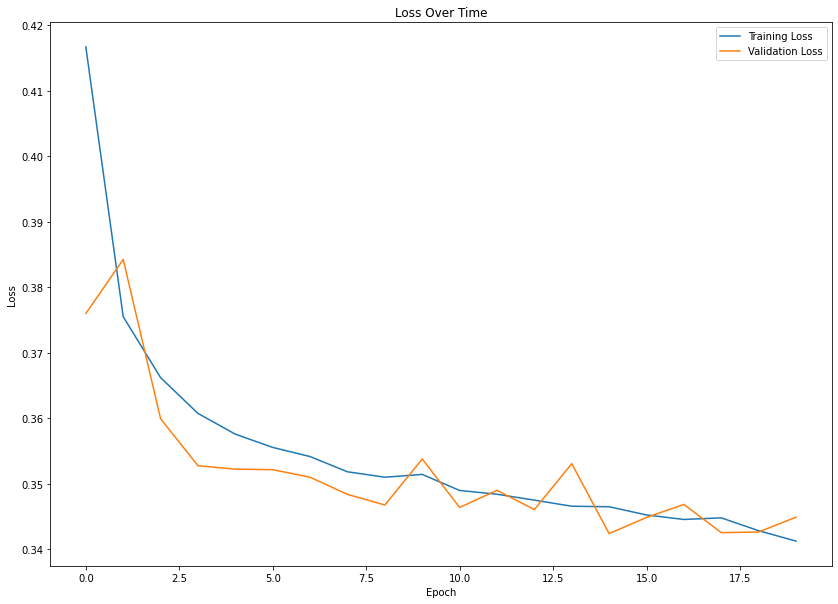

In [59]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [60]:
predicted_vals = tf.argmax(model(X_test[0:128]), -1)
sum = 0
for i in range(128):
    #print(i)
    print(y_test.values[i], " > ", predicted_vals.numpy()[i])
    if(y_test.values[i] != predicted_vals[i].numpy()):
        sum += 1;
#print(y_test[0], " > ", predicted_vals[0].numpy())
print(sum)

0  >  0
0  >  0
0  >  0
0  >  0
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
0  >  0
0  >  0
0  >  0
1  >  1
1  >  0
0  >  0
1  >  1
0  >  1
0  >  1
0  >  0
0  >  1
0  >  1
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
0  >  1
0  >  0
0  >  0
1  >  1
1  >  1
1  >  0
1  >  1
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
1  >  1
0  >  0
0  >  1
0  >  0
0  >  0
0  >  0
1  >  1
0  >  0
0  >  0
1  >  1
0  >  0
0  >  0
0  >  0
1  >  1
1  >  1
0  >  1
0  >  0
0  >  0
1  >  0
1  >  1
0  >  0
0  >  0
1  >  1
1  >  0
0  >  0
1  >  1
1  >  1
1  >  0
0  >  0
0  >  0
0  >  1
0  >  0
0  >  0
0  >  0
0  >  0
0  >  0
0  >  1
1  >  1
1  >  0
0  >  0
1  >  1
1  >  1
0  >  0
1  >  1
0  >  0
1  >  1
0  >  1
0  >  0
0  >  0
1  >  0
0  >  0
0  >  0
1  >  1
1  >  1
0  >  0
0  >  0
1  >  1
0  >  0
1  >  1
1  >  1
0  >  1
0  >  0
0  >  0
0  >  0
0  >  0
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
1  >  1
0  >  0
0  >  0
0  >  0
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
1  >  1
0  >  0
1  >  1
1  >  1
1  >  1
1  >  1
0  >  0
0  >  1


In [61]:
models = {
    #"   K-Nearest Neighbors": KNeighborsClassifier(),
    #"   Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
   
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

         Decision Tree trained.


In [62]:
for name, model in models.items():
  print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

         Decision Tree Accuracy: 93.82%


In [86]:
for name, model in models.items():

    prediction = model.predict(X_test[0:128], -1)
    


In [89]:

for name, model in models.items():
   
    values = zip(y_test, prediction)

      